# POO en Matplotlib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser import parse

In [2]:
f = '../../data/Temixco_2018_10Min.csv'
tmx = pd.read_csv(f,index_col=0,parse_dates=True)
columnas = tmx.columns
columnas

Index(['Ib', 'Ig', 'To', 'RH', 'WS', 'WD', 'P'], dtype='object')

(18.0, 35.0)

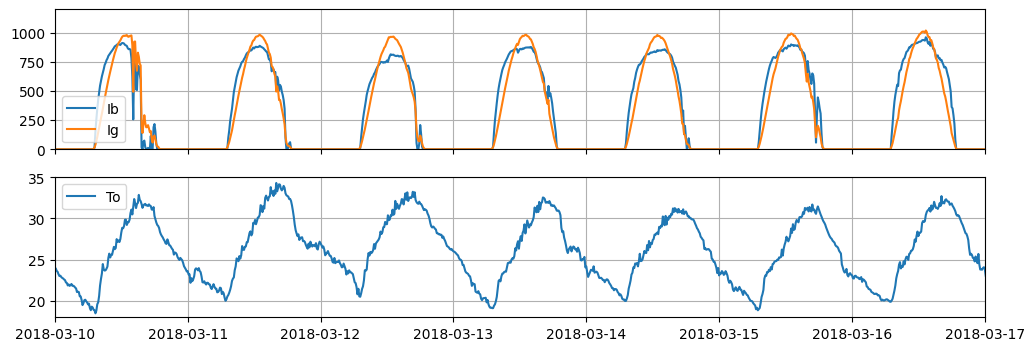

In [3]:
fig, ax = plt.subplots(2,figsize=(12,4),sharex=True)

fecha1 = parse("2018-03-10")
fecha2 = fecha1 + pd.Timedelta("7D")

for columna in columnas[:2]:
    ax[0].plot(tmx[columna],label=columna)

ax[1].plot(tmx.To,label="To")
    
for eje in ax:
    eje.set_xlim(fecha1,fecha2)
    eje.legend()
    eje.grid()

ax[0].set_ylim(0,1200)
ax[1].set_ylim(18,35)

In [4]:
f = '../../data/personas_cargas.csv'
cargas = pd.read_csv(f,index_col=0,parse_dates=True)
cargas.columns

Index(['B2_LIGHT:Lights Electricity Rate (W)',
       'B1:Lights Electricity Rate (W)',
       'COCINA_ESTUFA_EQUIPMENT:Electric Equipment Electricity Rate (W)',
       'COCINA_REFR_EQUIPMENT:Electric Equipment Electricity Rate (W)',
       'ESTANCIA_COCINA_LIGHT:Lights Electricity Rate (W)',
       'ESTANCIA_TV_EQUIPMENT:Electric Equipment Electricity Rate (W)',
       'R1_LIGHT:Lights Electricity Rate (W)',
       'R2_LIGHT:Lights Electricity Rate (W)',
       'R3_LIGHT:Lights Electricity Rate (W)',
       'COCINA_STAND_BY_EQUIPMENT:Electric Equipment Electricity Rate (W)',
       'B1:Space People Occupant Count ()',
       'B2:Space People Occupant Count ()',
       'COCINA:Space People Occupant Count ()',
       'R1:Space People Occupant Count ()',
       'R2:Space People Occupant Count ()',
       'R3:Space People Occupant Count ()'],
      dtype='object')

In [5]:
watts = [columna for columna in cargas.columns if '(W)'  in columna]
personas = [columna for columna in cargas.columns if 'People'  in columna]
watts, personas

(['B2_LIGHT:Lights Electricity Rate (W)',
  'B1:Lights Electricity Rate (W)',
  'COCINA_ESTUFA_EQUIPMENT:Electric Equipment Electricity Rate (W)',
  'COCINA_REFR_EQUIPMENT:Electric Equipment Electricity Rate (W)',
  'ESTANCIA_COCINA_LIGHT:Lights Electricity Rate (W)',
  'ESTANCIA_TV_EQUIPMENT:Electric Equipment Electricity Rate (W)',
  'R1_LIGHT:Lights Electricity Rate (W)',
  'R2_LIGHT:Lights Electricity Rate (W)',
  'R3_LIGHT:Lights Electricity Rate (W)',
  'COCINA_STAND_BY_EQUIPMENT:Electric Equipment Electricity Rate (W)'],
 ['B1:Space People Occupant Count ()',
  'B2:Space People Occupant Count ()',
  'COCINA:Space People Occupant Count ()',
  'R1:Space People Occupant Count ()',
  'R2:Space People Occupant Count ()',
  'R3:Space People Occupant Count ()'])

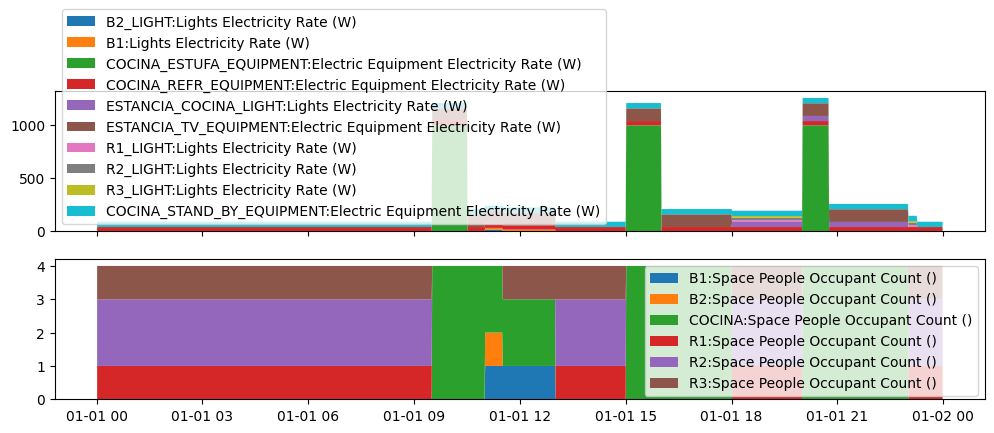

In [6]:
fig, ax = plt.subplots(2,figsize=(12,4),sharex=True)

ax[0].stackplot(cargas.index,*[cargas[watt] for watt in watts],labels= watts)
ax[1].stackplot(cargas.index,*[cargas[persona] for persona in personas],labels= personas)

for eje in ax:
    eje.legend()
plt.show()

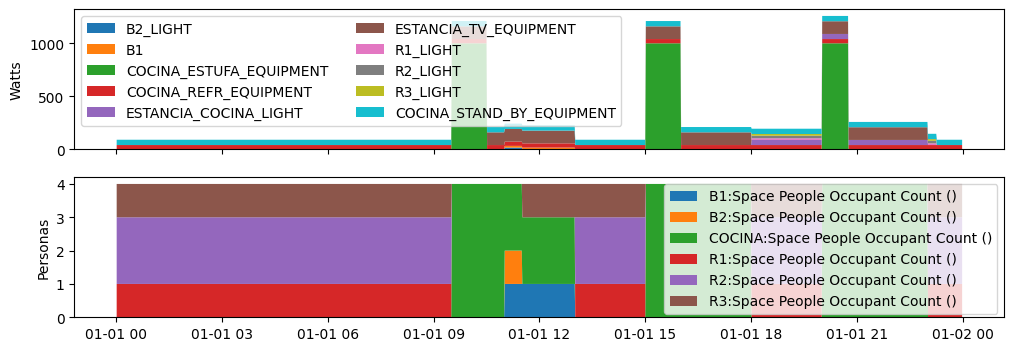

In [10]:
fig, ax = plt.subplots(2,figsize=(12,4),sharex=True)

ax[0].stackplot(cargas.index,*[cargas[watt] for watt in watts],labels= watts)
ax[1].stackplot(cargas.index,*[cargas[persona] for persona in personas],labels= personas)

handles, labels_cargas = ax[0].get_legend_handles_labels()
labels_cargas = [etiqueta.split(":")[0] for etiqueta in labels_cargas]
ax[0].legend(handles, labels_cargas,ncol=2)
ax[1].legend()

ax[0].set_ylabel("Watts")
ax[1].set_ylabel("Personas")
plt.show()

# Comentar sobre posible falta de legibilidad para alguien que apenas comienza, bueno y malo